In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
        
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mal' in f.name]
import matplotlib.pyplot as plt
plt.rc('font', family="Malgun Gothic")

In [29]:
import pandas as pd
hotel_data = pd.read_csv("data/hotel_bookings_data_preprocess.csv",index_col=0)


In [30]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,change_room,group_total,is_group,lead_term,adr_term,precan_bool,Package(bool),parkinglot
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,2.0,0,4.0,1.0,0,0.0,0.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,2.0,0,5.0,1.0,0,0.0,0.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,1,1.0,0,1.0,2.0,0,0.0,0.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,0,1.0,0,1.0,2.0,0,1.0,0.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,0,2.0,0,1.0,3.0,0,1.0,0.0


### 각 호텔의 예약 비율

#### 전체

([<matplotlib.patches.Wedge at 0x25bd278e388>,
 [Text(-1.0816901322969623, 0.19986609940502825, 'City Hotel'),
  Text(1.0816901135841428, -0.1998662006801662, 'Resort Hotel')],
 [Text(-0.5900127994347066, 0.10901787240274267, '66.4%'),
  Text(0.5900127892277142, -0.10901792764372702, '33.6%')])

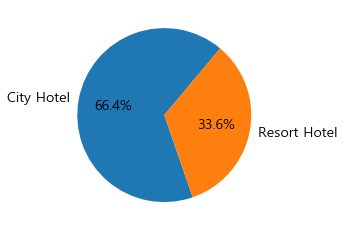

In [4]:
plt.rcParams['figure.figsize'] = 4,4
labels = hotel_data['hotel'].value_counts().index.tolist()
sizes = hotel_data['hotel'].value_counts().tolist()
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=50, textprops={'fontsize': 14})

#### 월별

In [35]:
resort_hotel = hotel_data[hotel_data['hotel']=='Resort Hotel']
city_hotel = hotel_data[hotel_data['hotel']=='City Hotel']

In [6]:
hotel_month = hotel_data[['hotel','arrival_date_month']]
hotel_month.groupby('arrival_date_month').count()

,hotel
arrival_date_month,
1,5921
2,8052
3,9768
4,11078
5,11780
6,10929
7,12644
8,13861
9,10500


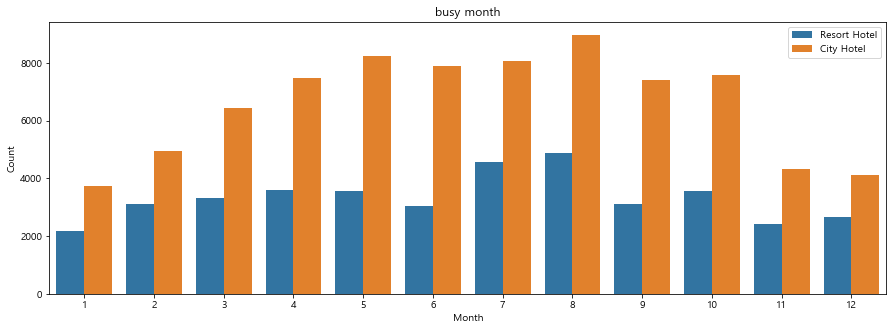

In [8]:
plt.figure(figsize=(15,5))

l1 = ['hotel','arrival_date_month']

sns.countplot(data = hotel_data[l1],x= "arrival_date_month",hue="hotel")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('busy month')
plt.legend(["Resort Hotel", "City Hotel"])

### 얼마나 일찍 호텔을 예약할까?

#### 각 구간별 구분 

In [9]:
grouped = hotel_data.groupby(['hotel'])
gdf = grouped.mean()
gdf

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,change_room,group_total,is_group,lead_term,adr_term,precan_bool,Package(bool),parkinglot
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,79701.820598,0.417859,109.884062,2016.174172,6.555942,27.175385,15.788234,0.794121,2.180817,1.854882,...,0.024342,0.546985,0.089410,1.951376,0.127282,2.398406,3.499236,0.068012,0.914741,0.024254
Resort Hotel,20030.196444,0.277674,92.693810,2016.121482,6.544360,27.139636,15.819437,1.189827,3.128549,1.867755,...,0.138088,0.619972,0.192724,2.010388,0.124853,2.219992,2.837266,0.027343,0.803676,0.137064


In [10]:
# 구간별 정리
hotel_data.loc[hotel_data['lead_time'] <= 30, 'lead_term'] = 'In 30days'
hotel_data.loc[(hotel_data['lead_time'] > 30) & (hotel_data['lead_time'] <= 90), 'lead_term'] = 'In 90days'
hotel_data.loc[(hotel_data['lead_time'] > 90) & (hotel_data['lead_time'] <= 180), 'lead_term'] = 'In 180days'
hotel_data.loc[(hotel_data['lead_time'] > 180) & (hotel_data['lead_time'] <= 365), 'lead_term'] = 'In 365days'
hotel_data.loc[(hotel_data['lead_time'] > 365), 'lead_term'] = 'Over 365days'

In [11]:
hotel_lt = hotel_data[["hotel","lead_time","lead_term"]]
hotel_lt

,hotel,lead_time,lead_term
0,Resort Hotel,342,In 365days
1,Resort Hotel,737,Over 365days
2,Resort Hotel,7,In 30days
3,Resort Hotel,13,In 30days
4,Resort Hotel,14,In 30days
...,...,...,...
119205,City Hotel,23,In 30days
119206,City Hotel,102,In 180days
119207,City Hotel,34,In 90days
119208,City Hotel,109,In 180days


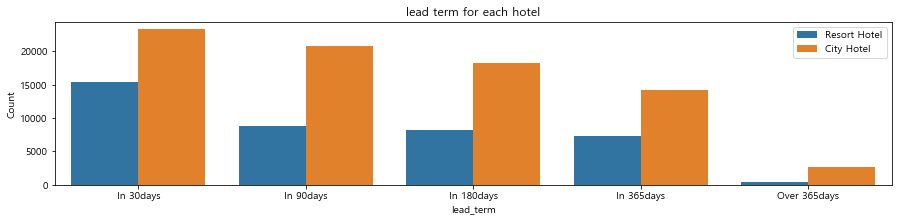

In [12]:
plt.figure(figsize=(15,3))

# data we will use in a list
l2 = ['hotel','lead_term']

# plotting
sns.countplot(data = hotel_lt[l2],x= "lead_term",hue="hotel", order=['In 30days','In 90days','In 180days','In 365days','Over 365days'])
plt.xlabel('lead_term')
plt.ylabel('Count')
plt.title('lead term for each hotel')
plt.legend(["Resort Hotel", "City Hotel"])

#### 호텔별 연도별 리드타임 비교

In [13]:
resort_hotel = hotel_data[hotel_data['hotel']=='Resort hotel']
city_hotel = hotel_data[hotel_data['hotel']=='City hotel']

In [14]:
hotel_lt = hotel_data[['hotel','lead_time']]
hotel_lt.groupby('hotel').mean()

,lead_time
hotel,
City Hotel,109.884062
Resort Hotel,92.693810


In [15]:
hotel_lt = hotel_data[['hotel','arrival_date_year','lead_time']]
hotel_lt.groupby('arrival_date_year').mean()

,lead_time
arrival_date_year,
2015,97.343151
2016,102.938311
2017,109.400492


Text(0.5, 1.0, 'Average Leadtime for each year')

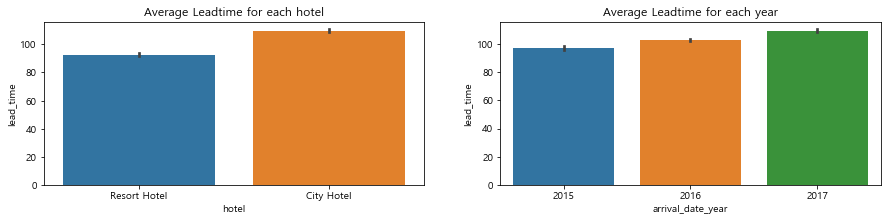

In [16]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='hotel', y='lead_time', data= hotel_lt)
plt.title('Average Leadtime for each hotel')
plt.subplot(1, 2, 2)
sns.barplot(x='arrival_date_year', y='lead_time', data= hotel_data)
plt.title('Average Leadtime for each year')

#### 박스플럿과 디스플럿

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

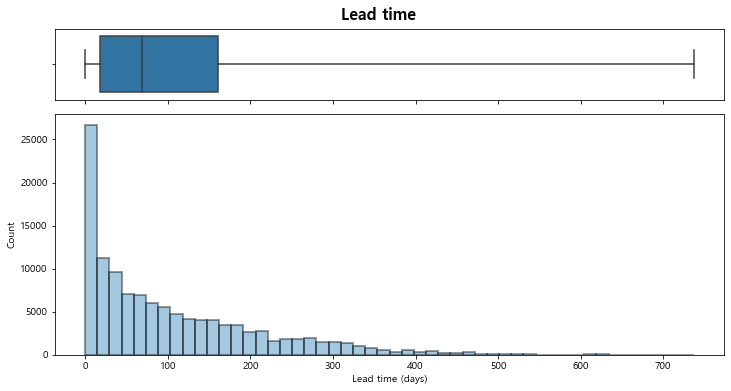

In [17]:
fig=plt.figure(figsize=(12,6))
ax1=plt.subplot2grid((4,1),(0,0))
ax2=plt.subplot2grid((4,1),(1,0),rowspan=3)
sns.boxplot(hotel_data["lead_time"],whis=30,ax=ax1)
sns.distplot(a=hotel_data["lead_time"],kde=False,hist_kws=dict(edgecolor="black",linewidth=2),ax=ax2)
plt.suptitle("Lead time",fontweight="bold",fontsize=16,y=0.93)
ax1.set_xlabel("")
ax1.set_xticklabels([])
ax2.set_xlabel("Lead time (days)")
ax2.set_ylabel("Count")

###  고객들의 출신국

In [18]:
hotel_ct = hotel_data[['hotel','country']]
hotel_ct.groupby('country').count().sort_values(by=['hotel'], axis=0, ascending=False).head(20)


,hotel
country,
PRT,48483
GBR,12120
FRA,10401
ESP,8560
DEU,7285
ITA,3761
IRL,3374
BEL,2342
BRA,2222


Text(0.5, 1.0, 'Top 20 guests country of origin')

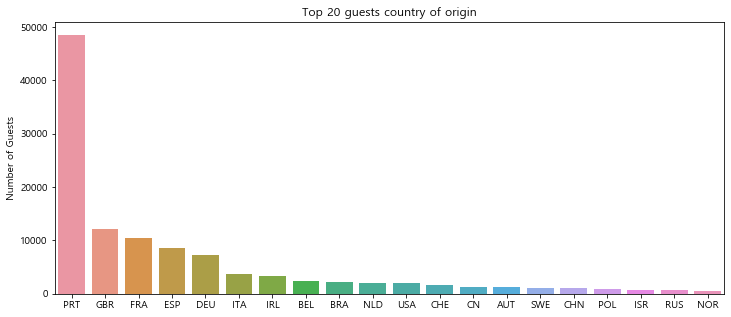

In [19]:
country=pd.DataFrame({"country":hotel_data["country"].value_counts().index.to_list(),
                      "Number":hotel_data["country"].value_counts().to_list()})

plt.figure(figsize=(12,5))
sns.barplot(x=country["country"].head(20),y=country["Number"].head(20))
plt.xlabel("")
plt.ylabel("Number of Guests")
plt.title("Top 20 guests country of origin")

### 호텔별 이용객 분류

In [20]:
hotel_ct = hotel_data[['hotel','customer_type']]
hotel_ct.groupby('customer_type').count()

,hotel
customer_type,
Contract,4072
Group,574
Transient,89476
Transient-Party,25088


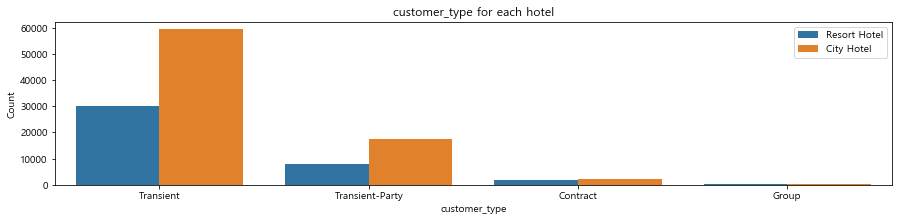

In [21]:
plt.figure(figsize=(15,3))

# data we will use in a list
l3 = ['hotel','customer_type']

# plotting
sns.countplot(data = hotel_data[l3],x= "customer_type",hue="hotel",order=['Transient','Transient-Party','Contract','Group'])
plt.xlabel('customer_type')
plt.ylabel('Count')
plt.title('customer_type for each hotel')
plt.legend(["Resort Hotel", "City Hotel"])

### 호텔 분류에 따른 주말,주중 투숙비율

In [25]:
주말_주중 = hotel_data[['hotel','stays_in_weekend_nights','stays_in_week_nights']]
주말_주중.groupby('hotel').mean()

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,0.794121,2.180817
Resort Hotel,1.189827,3.128549


In [38]:
리조트_주말_주중 = resort_hotel[['hotel','stays_in_weekend_nights','stays_in_week_nights','arrival_date_month']]
리조트_주말_주중.groupby('arrival_date_month').mean()

,stays_in_weekend_nights,stays_in_week_nights
arrival_date_month,,
1,0.762665,2.145596
2,0.877498,2.226950
3,1.034193,3.091182
4,1.142145,2.888335
5,1.182636,3.107053
6,1.493101,3.871879
7,1.495298,3.819593
8,1.466490,3.781978
9,1.365187,3.696911


In [37]:
시티_주말_주중 = city_hotel[['hotel','stays_in_weekend_nights','stays_in_week_nights','arrival_date_month']]
시티_주말_주중.groupby('arrival_date_month').mean()

,stays_in_weekend_nights,stays_in_week_nights
arrival_date_month,,
1,0.785523,2.210188
2,0.837980,2.146667
3,0.764532,2.279764
4,0.855001,2.191324
5,0.734339,2.104975
6,0.699429,2.186557
7,0.907199,2.229959
8,0.836735,2.315156
9,0.761769,2.025298


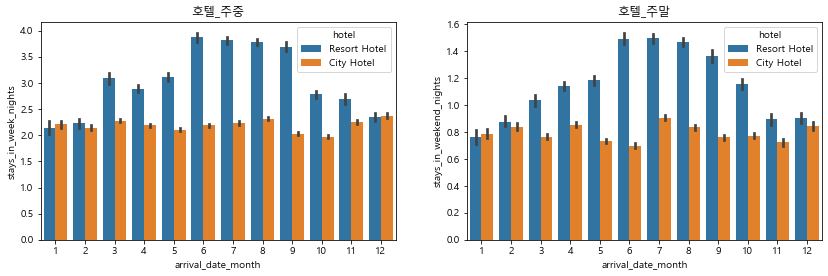

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,4))

sns.barplot(data = hotel_data, x = "arrival_date_month", y ="stays_in_weekend_nights", ax=axes[1], hue='hotel')
sns.barplot(data = hotel_data, x = "arrival_date_month", y ="stays_in_week_nights", ax=axes[0],hue='hotel')

axes[0].title.set_text('호텔_주중')
axes[1].title.set_text('호텔_주말')

### children,baby 의 여부에 따른 roomtype 상관관계

In [42]:
hotel_data["family"] = 0
hotel_data.loc[ (hotel_data['children'] != 0) | (hotel_data['babies'] != 0) ,"family"]  = 1
hotel_data.loc[hotel_data["adults"]==0,"family"] = 0

In [ ]:
family_customer = hotel_bookings_data[hotel_bookings_data['family']==1] 

family_customer[['assigned_room_type','hotel',"group_total"]].pivot_table(index="group_total",
                                                                         columns='assigned_room_type',
                                                                         aggfunc=['count'])